# Project: Covid-19 Public Media Dataset by Anacode

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
> The Covid-19 Public Media Dataset by Anacode is a resource of over 470,000 online articles related to Covid-19 with full texts which were scraped from online media in the time span January 1, 2020 - April 31, 2022. The dataset includes articles from more than 200 English-language resources from various domains and is meant to provide a representative cross-section of the online content that was produced and absorbed during this period, the database is stored in a csv file and the data was scraped from a range of more than 60 high-impact blogs and news websites.


### Question(s) for Analysis
> By exploring the dataset, we planned to answer the following questions: the first question is about the percentage of articles that contain words related to COVID-19 and the changes in the numbers of these articles over the period from January 2020 to the end of April 2022, the second question was about comparing the percentage of times that the negative psychological and economic effects were mentioned for all articles, as well as articles that contained words related to COVID-19, the third question is about the top five domains that the COVID-19 articles were from, with displaying the percentage with other domains, and the fourth question is about top five sustainable development goals were mentioned at all articles, with visualizing all results of questions.

<a id='wrangling'></a>
## Data Wrangling

In [1]:
# Importing all of the packages that will be used.
import collections
from ast import literal_eval
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['font.size'] = 14

### Step1: Loading data

In [2]:
# Read the csv file into a data frame.
df = pd.read_csv("../input/covid19-public-media-dataset/covid19_articles_20220420.csv")
df.head()

,Unnamed: 0,author,date,domain,title,content,datatype,companies,locations,sdgs
0,389108,NaN,2020-01-02,digitaljournal,Looking into the truth about modern workplace ...,"['Hi, what are you looking for?', 'By', 'Publi...",general,[],['UnitedKingdomofGreatBritainandNorthernIreland'],"['PeaceJusticeAndStrongInstitutions', 'Climate..."
1,119150,NaN,2020-01-02,bnnbloomberg,Hexo refiles financial statements,"['New York reported a record 90,132 new Covid-...",general,[],[],['ReduceInequalities']
2,389111,NaN,2020-01-02,digitaljournal,"Japan raid, Turkey arrests in widening Ghosn p...","['Hi, what are you looking for?', 'By', 'Publi...",general,[],"['Lebanon', 'RussianFederation', 'Japan', 'Tur...","['PeaceJusticeAndStrongInstitutions', 'GoodHea..."
3,389110,NaN,2020-01-02,digitaljournal,Pope's bodyguards criticised over slapping inc...,"['Hi, what are you looking for?', 'By', 'Publi...",general,['TwitterInc'],['Italy'],[]
4,389113,NaN,2020-01-02,digitaljournal,Lebanon denies president welcomed fugitive Ghosn,"['Hi, what are you looking for?', 'By', 'Publi...",general,[],"['China', 'Lebanon', 'Ukraine', 'Japan']",['PeaceJusticeAndStrongInstitutions']


### Step2: Checking characteristics of the data frame

In [3]:
# Get the information of dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477551 entries, 0 to 477550
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  477551 non-null  int64 
 1   author      195053 non-null  object
 2   date        477551 non-null  object
 3   domain      477551 non-null  object
 4   title       477551 non-null  object
 5   content     477551 non-null  object
 6   datatype    477539 non-null  object
 7   companies   477551 non-null  object
 8   locations   477551 non-null  object
 9   sdgs        477527 non-null  object
dtypes: int64(1), object(9)
memory usage: 36.4+ MB


In [4]:
# Count the duplicated rows.
df.duplicated().sum()

0

In [5]:
# Count the null values for every column.
df.isnull().sum()

Unnamed: 0         0
author        282498
date               0
domain             0
title              0
content            0
datatype          12
companies          0
locations          0
sdgs              24
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

### Question 1: Get the percentage of articles that contain words related to COVID-19 with monitoring the changes in the numbers of these articles over the period from January 2020 to the end of April 2022, using visualization.

In [6]:
# Get the percentage of articles that only contains words about Covid-19.
df_covid=df.loc[df.content.str.contains('Covid')|df.content.str.contains('covid')]
print('The percentage of articles that only contains words about COVID-19 is {}%'.format(round((df_covid.shape[0]/df.shape[0])*100, 2)))

The percentage of articles that only contains words about COVID-19 is 32.52%


In [ ]:
# Convert the format of the column: data, from object to datetime.
df_covid['date'] = pd.to_datetime(df_covid.date)

In [ ]:
# Add a new column that combines month with year for covid articles.
df_covid['month/year'] = pd.DatetimeIndex(df_covid.date).month.astype(str) + ' / ' + pd.DatetimeIndex(df_covid.date).year.astype(str)

In [9]:
# Get the number for covid articles for every month during 2020-2022.
df_date_articles= df_covid.groupby('month/year', sort=False)['content'].size().reset_index(name='number of articles')
df_date_articles

,month/year,number of articles
0,1 / 2020,257
1,2 / 2020,841
2,3 / 2020,6593
3,4 / 2020,10149
4,5 / 2020,9914
5,6 / 2020,8753
6,7 / 2020,12555
7,8 / 2020,7812
8,9 / 2020,8448
9,10 / 2020,4934


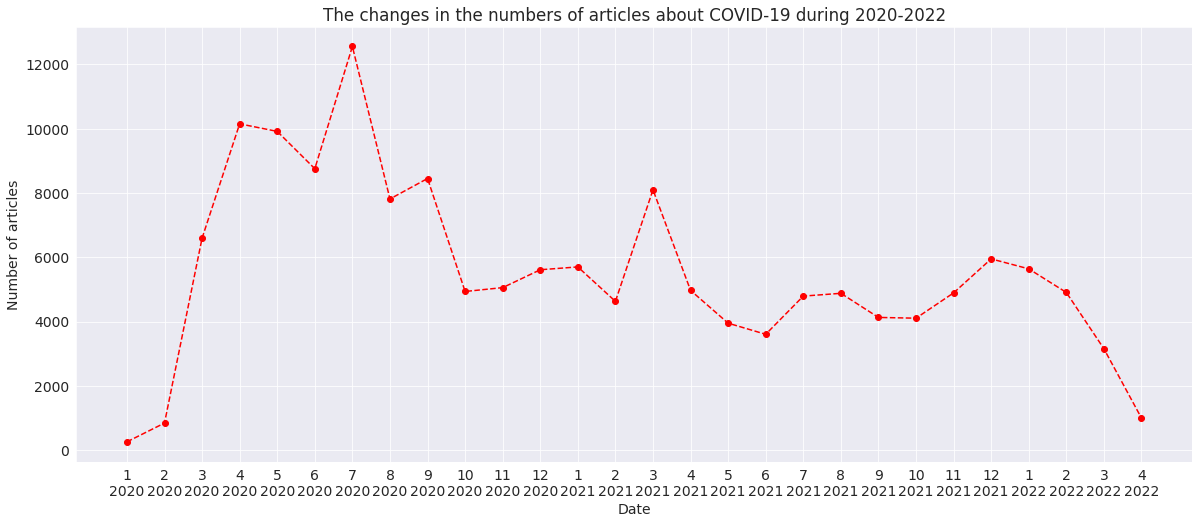

In [10]:
# Visualze for the number of covid articles during 2020-2022.
sns.set_style("darkgrid")
plt.figure(figsize=(20, 8))
plt.plot(df_date_articles['month/year'].str.replace(' / ', '\n'),df_date_articles['number of articles'],'o--r')
plt.xlabel('Date')
plt.ylabel('Number of articles')
plt.title('The changes in the numbers of articles about COVID-19 during 2020-2022');

### * It is clear from the above the changes in the number of articles that dealt with COVID-19 directly during the period from January 2020 until the end of April 2022, which reached its highest point in July 2020, as well as the gradual decrease during 2022.

### Question 2: Compare the percentage of times that the negative psychological and economic effects were mentioned for all articles, as well as articles that contained words related to COVID-19, using visualization.

In [52]:
# Function for plotting by bars.
def barplotting(table,xlabel,ylabel,title):
    plt.figure(figsize=(15, 10))
    sns.barplot(x=xlabel,y=ylabel,data=table, palette=['turquoise','fuchsia'])
    plt.title(title);

In [11]:
# Find the percentage of articles that included the negative emotions represented in concepts of anxiety, depression, stress, fear, scare, and burnout for all articles.
psycho_all = round((df.loc[df.content.str.contains('Anxiety')|df.content.str.contains('anxiety')|df.content.str.contains('anxious')|df.content.str.contains('Depression')|df.content.str.contains('depression')|df.content.str.contains('depressed')|df.content.str.contains('Stress')|df.content.str.contains('stress')|df.content.str.contains('Fear')|df.content.str.contains('fear')|df.content.str.contains('Scare')|df.content.str.contains('scare')|df.content.str.contains('Burnout')|df.content.str.contains('burnout')].shape[0]/df.shape[0])*100, 2)
psycho_all

19.81

In [12]:
# Find the percentage of articles that included the negative emotions represented in concepts of anxiety, depression, stress, fear, scare, and burnout for covid articles.
psycho_covid = round((df_covid.loc[df_covid.content.str.contains('Anxiety')|df_covid.content.str.contains('anxiety')|df_covid.content.str.contains('anxious')|df_covid.content.str.contains('Depression')|df_covid.content.str.contains('depression')|df_covid.content.str.contains('depressed')|df_covid.content.str.contains('Stress')|df_covid.content.str.contains('stress')|df_covid.content.str.contains('Fear')|df_covid.content.str.contains('fear')|df_covid.content.str.contains('Scare')|df_covid.content.str.contains('scare')|df_covid.content.str.contains('Burnout')|df_covid.content.str.contains('burnout')].shape[0]/df_covid.shape[0])*100, 2)
psycho_covid

25.18

In [14]:
# Create a data frame contains percentage of negative emotions for: all articles & covid articles. 
df_psycho=pd.DataFrame.from_dict({'Article Type':['All articles','Covid articles'],'Percentage':[psycho_all,psycho_covid]})
df_psycho

,Article Type,Percentage
0,All articles,19.81
1,Covid articles,25.18


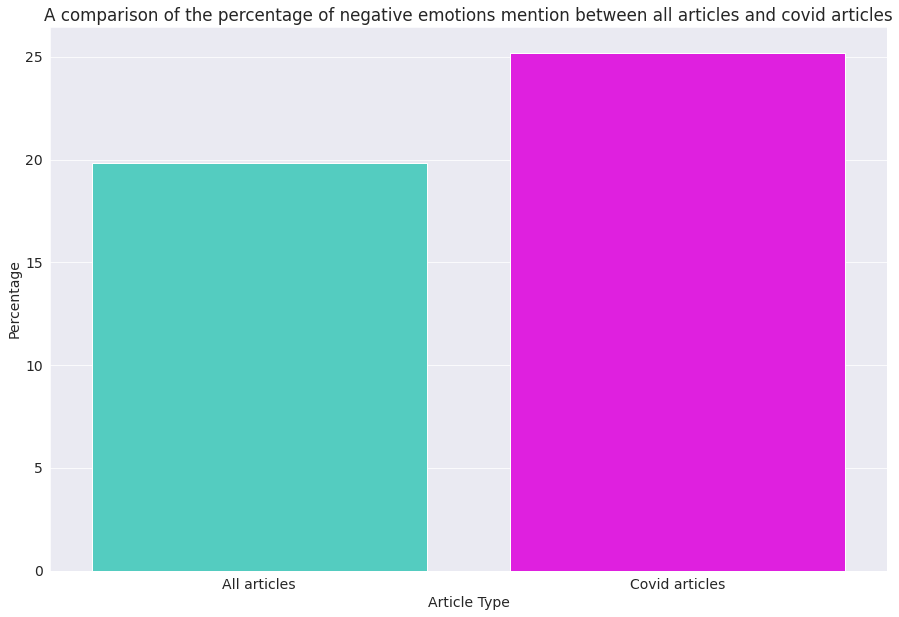

In [15]:
# Visualize the data frame contents by barplot.
barplotting(df_psycho,'Article Type','Percentage','A comparison of the percentage of negative emotions mention between all articles and covid articles')

### * It is clear from the above that negative feelings such as anxiety, depression, fear and others were mentioned more in articles that dealt with COVID-19 directly compared to mentioning those terms in all articles, now we will try the same strategy with terms related to economic conditions and see the results.

In [16]:
# Find the percentage of articles that included the concepts of recession, inflation, stagflation, deflation, and rising prices for all articles.
eco_all=round((df.loc[df.content.str.contains('Recession')|df.content.str.contains('recession')|df.content.str.contains('Inflation')|df.content.str.contains('inflation')|df.content.str.contains('Stagflation')|df.content.str.contains('stagflation')|df.content.str.contains('Deflation')|df.content.str.contains('deflation')|df.content.str.contains('Rising price')|df.content.str.contains('rising price')|df.content.str.contains('Rise price')|df.content.str.contains('rise price')].shape[0]/df.shape[0])*100, 2)
eco_all

8.8

In [17]:
# Find the percentage of articles that included the concepts of recession, inflation, stagflation, deflation, and rising prices for covid articles.
eco_covid=round((df_covid.loc[df_covid.content.str.contains('Recession')|df_covid.content.str.contains('recession')|df_covid.content.str.contains('Inflation')|df_covid.content.str.contains('inflation')|df_covid.content.str.contains('Stagflation')|df_covid.content.str.contains('stagflation')|df_covid.content.str.contains('Deflation')|df_covid.content.str.contains('deflation')|df_covid.content.str.contains('Rising price')|df_covid.content.str.contains('rising price')|df_covid.content.str.contains('Rise price')|df_covid.content.str.contains('rise price')].shape[0]/df_covid.shape[0])*100, 2)
eco_covid

10.13

In [18]:
# Create a data frame contains percentage of negative economic conditions for: all articles & covid articles.
df_eco=pd.DataFrame.from_dict({'Article Type':['All articles','Covid articles'],'Percentage':[eco_all,eco_covid]})
df_eco

,Article Type,Percentage
0,All articles,8.80
1,Covid articles,10.13


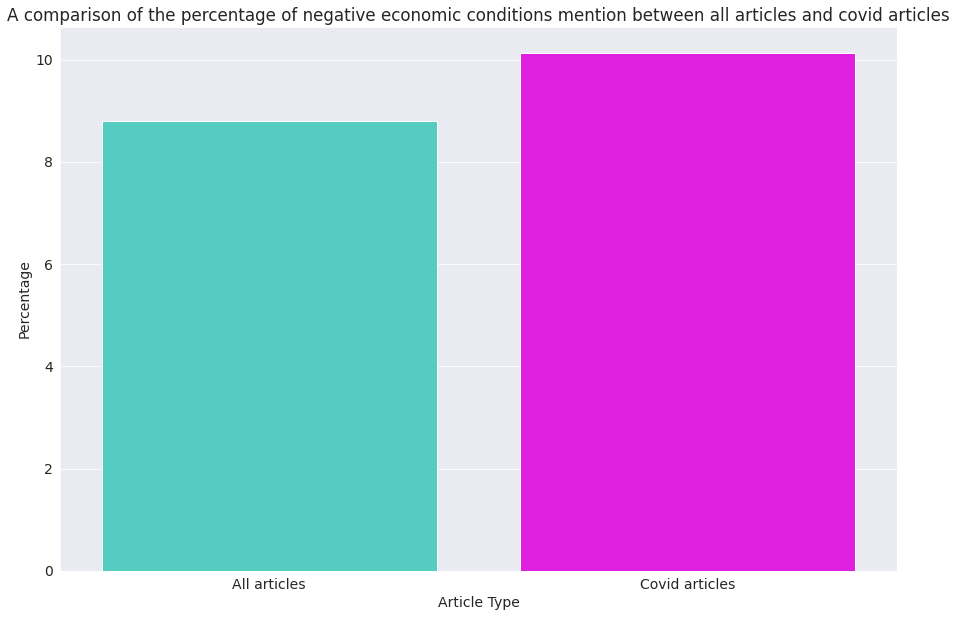

In [19]:
# Visualize the data frame contents by barplot.
barplotting(df_eco,'Article Type','Percentage','A comparison of the percentage of negative economic conditions mention between all articles and covid articles')

### * It is clear from the above that the same results were repeated for negative economic conditions such as recession, inflation, stagflation, and others and were mentioned more in articles that dealt with COVID-19 directly compared to mentioning those terms in all articles.

### Question 3: Get the top five domains that the COVID-19 articles were from, with displaying the percentage with other domains using visualization.

In [20]:
# Find the top five domains that covid articles were from.
df_covid_most_domains = df_covid.groupby(['domain'])[['domain']].count().rename(columns={'domain':'number of articles'}).sort_values('number of articles', ascending=False).head()
df_covid_most_domains

,number of articles
domain,
theguardian,17833
cnbc,15258
finance.yahoo,14498
digitaljournal,11197
edition.cnn,8864


In [21]:
# Insert a row for the covid articles for other domains.
df_covid_most_domains.loc['other'] = df_covid.shape[0] - df_covid_most_domains['number of articles'].sum()
df_covid_most_domains

,number of articles
domain,
theguardian,17833
cnbc,15258
finance.yahoo,14498
digitaljournal,11197
edition.cnn,8864
other,87634


In [22]:
df_covid_most_domains_percent=pd.DataFrame.from_dict({'theguardian':round((df_covid_most_domains.loc['theguardian']/df_covid_most_domains.sum())*100,2),
                                  'cnbc':round((df_covid_most_domains.loc['cnbc']/df_covid_most_domains.sum())*100,2),
                                  'finance.yahoo':round((df_covid_most_domains.loc['finance.yahoo']/df_covid_most_domains.sum())*100,2),
                                  'digitaljournal':round((df_covid_most_domains.loc['digitaljournal']/df_covid_most_domains.sum())*100,2),
                                  'edition.cnn':round((df_covid_most_domains.loc['edition.cnn']/df_covid_most_domains.sum())*100,2),
                                  'other':round((df_covid_most_domains.loc['other']/df_covid_most_domains.sum())*100,2)})
df_covid_most_domains_percent.rename(index={'number of articles':'Percentage of articles'})

,theguardian,cnbc,finance.yahoo,digitaljournal,edition.cnn,other
Percentage of articles,11.48,9.83,9.34,7.21,5.71,56.43


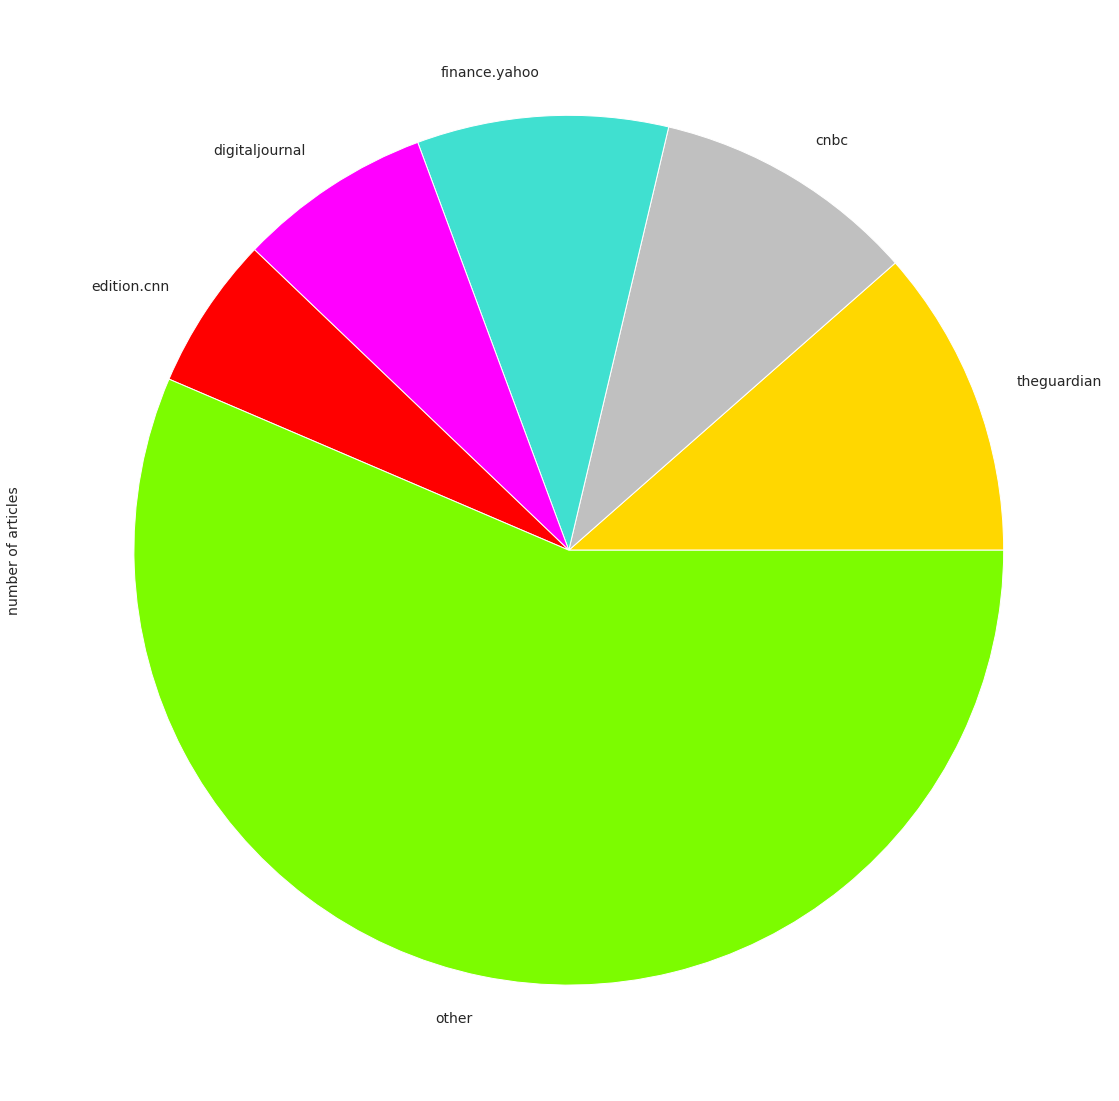

In [23]:
# Visualize the number of covid articles for domains.
df_covid_most_domains['number of articles'].plot.pie(subplots=True, figsize=(20,20), colors=['gold','silver','turquoise','fuchsia','red','lawngreen']);

### * It is clear from the above the top five domains that the COVID-19 articles were from, and that their percentage is slightly less than half of the articles that dealt directly with COVID-19, as the list began with theguardian, then cnbc and ended with edition.cnn.

### Question 4: Get the top five sustainable development goals were mentioned at all articles, using visualization.

In [24]:
# Remove the rows that with empty lists at the column: sdgs.
df_sdgs=df[df.astype(str)['sdgs'] != '[]']

In [ ]:
# Remove the rows that with null values at the column: sdgs.
df_sdgs.dropna(subset=['sdgs'],inplace=True)

In [ ]:
# Convert the values format from string to list for the column: sdgs.
df_sdgs.sdgs = df_sdgs.sdgs.apply(literal_eval)

In [27]:
# Count articles for every sustainable development goal.
try:
    sdgs_counts = collections.Counter(df_sdgs['sdgs'].agg(sum))
except:
    pass

In [48]:
# Find the top five sustainable development goals was mentioned at all articles.
df_most_sdgs = pd.DataFrame.from_dict(sdgs_counts, orient='index').rename(columns={0:'number of articles'}).sort_values('number of articles', ascending=False).head()
df_most_sdgs

,number of articles
GoodHealthAndWellbeing,244765
PeaceJusticeAndStrongInstitutions,211260
DecentWorkAndEconomicGrowth,47453
IndustryInnovationAndInfrastructure,40048
GenderEquality,39021


In [49]:
# Insert a row for the total articles for other sdgs.
df_most_sdgs.loc['other'] = sum(sdgs_counts.values()) - df_most_sdgs['number of articles'].sum()
df_most_sdgs

,number of articles
GoodHealthAndWellbeing,244765
PeaceJusticeAndStrongInstitutions,211260
DecentWorkAndEconomicGrowth,47453
IndustryInnovationAndInfrastructure,40048
GenderEquality,39021
other,139520


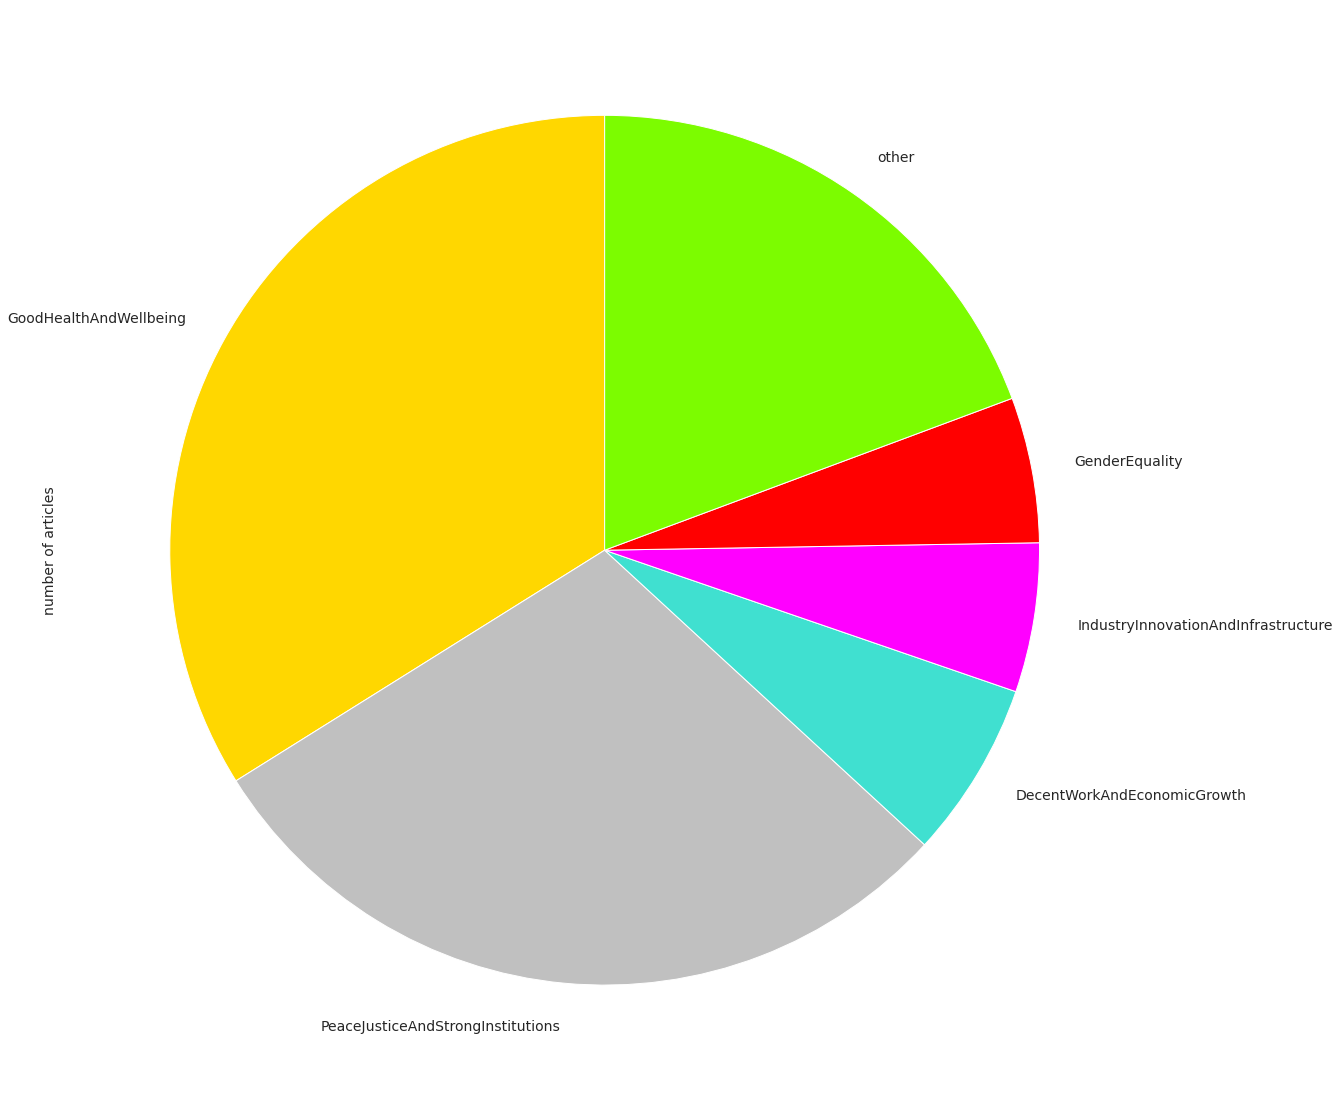

In [50]:
# Visualize the number of articles for sdgs.
df_most_sdgs['number of articles'].plot.pie(subplots=True, figsize=(20,20), startangle= 90, colors=['gold','silver','turquoise','fuchsia','red','lawngreen']);

### * It is clear from the top five sustainable development goals were mentioned at all articles, as the list began with 'GoodHealthAndWellbeing', then 'PeaceJusticeAndStrongInstitutions' and ended with 'GenderEquality'.

<a id='conclusions'></a>
## Conclusions

Through the previous results, the following was found:

> **The First Result**: That was about changes in the number of articles that dealt with COVID-19 directly during the period from January 2020 until the end of April 2022, and it was clear that the gradual rise in the number of articles dealing with COVID-19 until it reached its highest point in July 2020 and then began to take a curve ranging between rise and fall until it started to decline regularly starting from 2022, which is a good indicator and we hope that it will continue The curve to descend as far as possible. 

> **The Second Result**: That was about comparing the percentage of times that the negative psychological and economic effects were mentioned for all articles, as well as articles that contained words related to COVID-19, and it was clear that the negative feelings such as anxiety, depression, fear and others were mentioned more in articles that dealt with COVID-19 directly compared to mentioning those terms in all articles, The same for negative economic conditions such as recession, inflation, stagflation, and others, it is also clear that the differences between the total articles and articles that dealt directly with COVID-19 are in fact minor differences, and the differences may be more clear if two groups of articles are compared, one in the same period and the other in a period far from the conditions of infection with COVID-19.

> **The Third Result**: That was about getting the top five domains that the COVID-19 articles were from, and it was clear that the list began with theguardian, then cnbc and ended with edition.cnn, and that their percentage is slightly less than half of the articles that dealt directly with COVID-19.

> **The Fourth Result**: That was about getting the top five sustainable development goals were mentioned at all articles, and it was clear the five sustainable development goals were mentioned at all articles, as the list began with 'GoodHealthAndWellbeing', then 'PeaceJusticeAndStrongInstitutions' and ended with 'GenderEquality', this may be considered normal for the circumstances of that period, which make the health file a top priority for countries and institutions.


